# Grid property management

In [1]:
%run setup.ipynb

Path setup complete.


Considering that we have created a grid, we wish to define properties for each cell of the grid for future simulations

In [2]:
import yads.mesh as ym

In [13]:
# First let us create a grid
grid = ym.two_D.create_2d_cartesian(Lx=5, Ly=5, Nx=5, Ny=5)

In [15]:
# Check cell center coordinates
grid.centers(item='cell')

array([[0.5, 0.5],
       [0.5, 1.5],
       [0.5, 2.5],
       [0.5, 3.5],
       [0.5, 4.5],
       [1.5, 0.5],
       [1.5, 1.5],
       [1.5, 2.5],
       [1.5, 3.5],
       [1.5, 4.5],
       [2.5, 0.5],
       [2.5, 1.5],
       [2.5, 2.5],
       [2.5, 3.5],
       [2.5, 4.5],
       [3.5, 0.5],
       [3.5, 1.5],
       [3.5, 2.5],
       [3.5, 3.5],
       [3.5, 4.5],
       [4.5, 0.5],
       [4.5, 1.5],
       [4.5, 2.5],
       [4.5, 3.5],
       [4.5, 4.5]])

Now we define cell properties as numpy array, for example permeability K:

In [4]:
import numpy as np

In [20]:
high_K = 10.
low_K = 1.

In [21]:
# Homegeneous case: all cells have the same property value
K_homogeneous = np.full(grid.nb_cells, high_K)

Heterogeneous case require to select specific cells and apply a different property value on them.

As an example we create a permeability zone in the lower right corner where the value is much lower 

In [32]:
# Permeability barrier zone creation
# First find the cell indexes where we want a different property. We define a rectangle and the methods finds the cells with a cell center inside the rectangle. 
barrier_cell_indexes = grid.find_cells_inside_square(up_left=(0., 2.), down_right=(2., 0.))
# Create basic value
K_heterogeneous = np.full(grid.nb_cells, high_K)
# Update with new values in the zone of interest
K_heterogeneous[barrier_cell_indexes] =  low_K

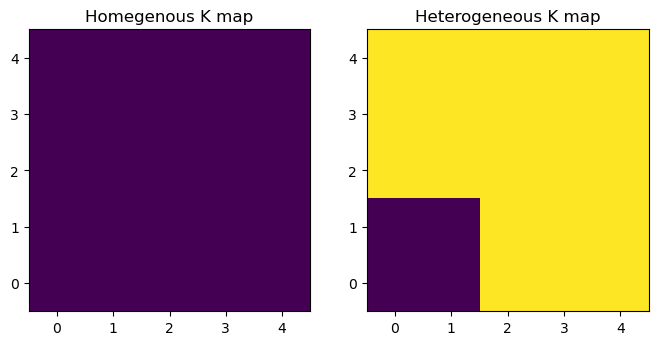

In [33]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 8))
ax1.imshow(K_homogeneous.reshape(5, 5).T)
ax2.imshow(K_heterogeneous.reshape(5, 5).T)
ax1.invert_yaxis()
ax2.invert_yaxis()
ax1.set_title("Homegenous K map")
ax2.set_title("Heterogeneous K map")
plt.show()

In [40]:
# One can also use numpy to define more advanced criterions
center_x, center_y = 2.5, 2.5 
distance = np.abs(grid.centers(item='cell')[:, 0] - center_x) + np.abs(grid.centers(item='cell')[:, 1] - center_y)
radius = 2. 
cirlce_indexes = np.where(distance <= radius)

In [43]:
# Circle permeability barrier zone creation
# Create basic value
K_heterogeneous = np.full(grid.nb_cells, high_K)
# Update with new values in the zone of interest
K_heterogeneous[cirlce_indexes] =  low_K

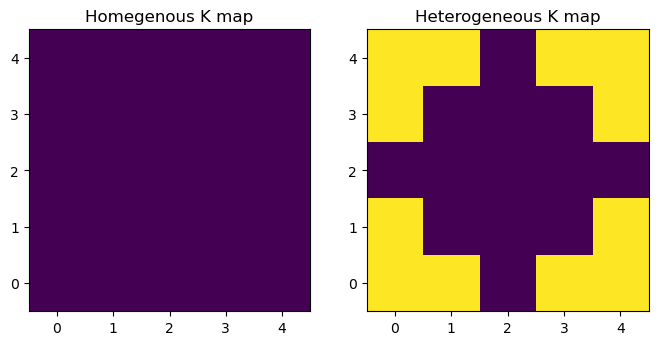

In [44]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 8))
ax1.imshow(K_homogeneous.reshape(5, 5).T)
ax2.imshow(K_heterogeneous.reshape(5, 5).T)
ax1.invert_yaxis()
ax2.invert_yaxis()
ax1.set_title("Homegenous K map")
ax2.set_title("Heterogeneous K map")
plt.show()